In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import keras

In [30]:
def extract_points(plot):

    plot_points = np.zeros_like(plot,dtype=np.int32)

    plot_points[plot > 127] = 255

    # plot_points_binary = cv2.adaptiveThreshold(plot,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)

    return plot_points

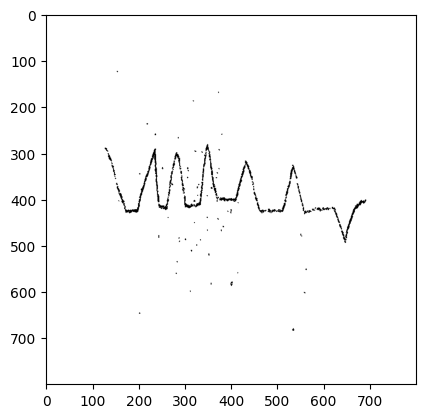

In [31]:
plot = cv2.imread('plot.jpg',cv2.IMREAD_GRAYSCALE)
plot_points = extract_points(plot)
plt.imshow(plot_points,cmap='gray')
plt.show()

(559, 2)


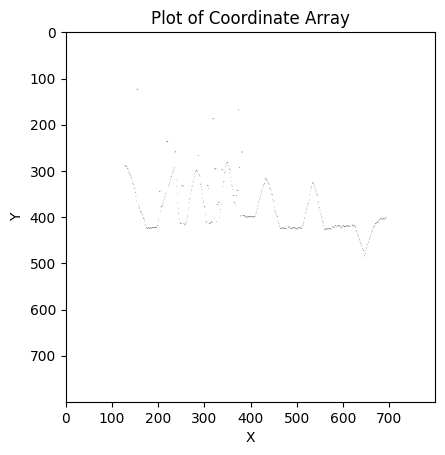

In [32]:
black_points = np.argwhere(plot_points == 0) 

_, unique_indices = np.unique(black_points[:, 1], return_index=True)
unique_black_points = black_points[unique_indices]

print(unique_black_points.shape)
max_x = np.max(unique_black_points[:, 1])
max_y = np.max(unique_black_points[:, 0])


image = np.ones((800,800))

for y, x in unique_black_points:
    image[int(y), int(x)] = 0

plt.imshow(image, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Coordinate Array')
plt.show()

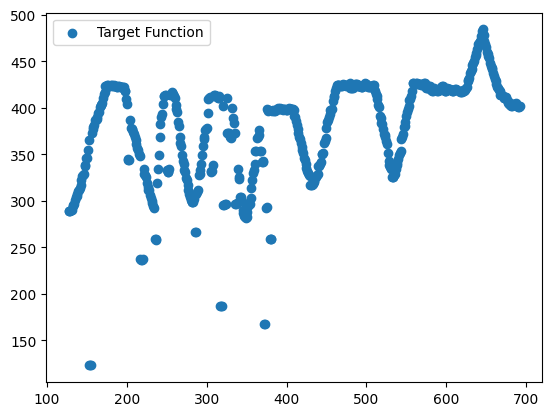

In [14]:
plt.scatter(unique_black_points[:,1], unique_black_points[:,0], label='Target Function')
plt.legend()
plt.show()

In [15]:
indices = np.argwhere(plot_points == 0)
print(indices.shape)

(6022, 2)


In [34]:
def generate_random_points(black_points,num_points):

    selected_indices = np.random.choice(black_points.shape[0], size=num_points, replace=False)
    selected_points = black_points[selected_indices]
    x_train = selected_points[:, 1]
    y_train = selected_points[:, 0]

    return x_train, y_train

In [138]:
a = np.array([[1,2],[1,3],[1,4]])
b = np.random.choice(3,1,replace=False)
a[b]

array([[1, 4]])

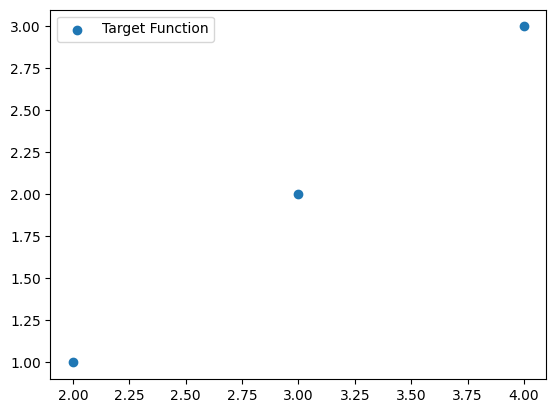

In [160]:
a = np.array([[1,2],[2,3],[3,4]])
plt.scatter(a[:,1], a[:,0], label='Target Function')
plt.legend()
plt.show()

In [54]:
def create_model(num_layers, num_neurons, activation_func):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(num_neurons, activation=activation_func, input_shape=(1,)))

    for _ in range(num_layers - 1):
        model.add(tf.keras.layers.Dense(num_neurons, activation=activation_func))

    model.add(tf.keras.layers.Dense(1))

    return model


def train_model(model, x_train, y_train, num_epochs, validation_split):
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=num_epochs, batch_size=100, validation_split=validation_split)


def evaluate_model(model, black_points, tolerance=0.1):
    
    x = black_points[:,1]
    y_target = black_points[:,0]
    y_pred = model.predict(x, batch_size=1000)
    print(y_pred.shape,y_target.shape,x.shape)
    # print(y_target)
    # print(y_pred)

    correct_predictions = np.sum(np.abs((y_pred.flatten() - y_target) / (y_target * 1.0)) < tolerance)
    precision = correct_predictions / len(black_points) * 100

    plt.scatter(x,y_target , label='Target Function')
    plt.scatter(x , y_pred, label='Approximated Function')
    plt.legend()
    plt.show()

    return precision

In [55]:
num_points = 559
num_layers = 3
num_neurons = 64
activation_func = 'relu'
num_epochs = 5000
validation_split = 0.2

x_train, y_train = generate_random_points(unique_black_points, num_points)

model = create_model(num_layers, num_neurons, activation_func)
train_model(model, x_train, y_train, num_epochs, validation_split)

precision = evaluate_model(model, unique_black_points)

print("Precision: {:.2f}%".format(precision))

Epoch 1/5000


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.2344 - val_loss: 0.6529
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.5524 - val_loss: 3.9264
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 1.4876 - val_loss: 3.3880
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 1.3378 - val_loss: 1.2054
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.7199 - val_loss: 0.5873
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.5068 - val_loss: 1.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.7757 - val_loss: 2.6190
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.9903 - val_loss: 2.1614
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.8769 - val_loss: 1.1251
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.6255 - val_loss: 0.5566
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.5020 - val_loss: 0.6645
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.5557 - val_loss: 1.0676
Epo

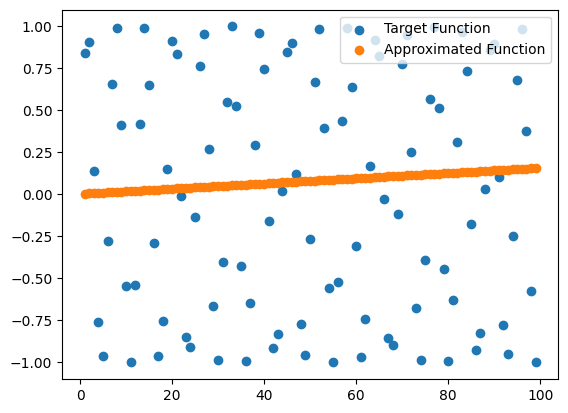

Precision: 0.00%


In [40]:
num_points = 100
num_layers = 3
num_neurons = 64
activation_func = 'relu'
num_epochs = 50
validation_split = 0.2

x_train = np.arange(1,100)
y_train = np.sin(np.arange(1,100))

x = np.arange(1,100)
y = np.sin(np.arange(1,100))
result = np.column_stack((y, x))

model = create_model(num_layers, num_neurons, activation_func)
train_model(model, x_train, y_train, num_epochs, validation_split)

precision = evaluate_model(model, result)

print("Precision: {:.2f}%".format(precision))

In [186]:
a = np.arange(3)
a

array([0, 1, 2])

In [188]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

# Create the 2D array
result = np.column_stack((arr1, arr2))

print(result)

[[1 4]
 [2 5]
 [3 6]]


Epoch 1/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 24078.8418 - val_loss: 76305.2188
Epoch 2/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 24009.0156 - val_loss: 76063.3203
Epoch 3/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 23943.7305 - val_loss: 75828.0547
Epoch 4/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 23883.5156 - val_loss: 75630.7891
Epoch 5/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 23828.1875 - val_loss: 75457.6719
Epoch 6/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 23774.8750 - val_loss: 75298.0703
Epoch 7/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 23725.7031 - val_loss: 75172.2109
Epoch 8/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 23688.3906 - val_loss: 75051.4219
Epoch 9/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 23648.6738 - val_loss: 74923.0234
Epoch 10/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 23608.8242 - val_loss: 74791.5000
Epoch 11/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 23569.5234 

C:\Users\plo\AppData\Local\Temp\ipykernel_21720\1997190569.py:27: RuntimeWarning: divide by zero encountered in divide
  correct_predictions = np.sum(np.abs((y_pred.flatten() - y_target) / (y_target * 1.0)) < tolerance)


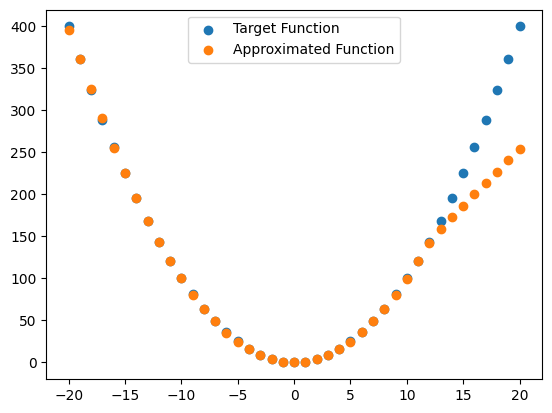

Precision: 80.49%


In [49]:
num_points = 40
num_layers = 3
num_neurons = 64
activation_func = 'relu'
num_epochs = 1500
validation_split = 0.2

x_train = np.arange(-20,21)
y_train = (np.arange(-20,21))**2

x = np.arange(-20,21)
y = (np.arange(-20,21))**2
result = np.column_stack((y, x))

model = create_model(num_layers, num_neurons, activation_func)
train_model(model, x_train, y_train, num_epochs, validation_split)

precision = evaluate_model(model, result)

print("Precision: {:.2f}%".format(precision))